# Global Plastic Pollution Analysis
* The main goal of this project is to analyse and compare the plastic waste generated in 2010 and the plastic waste mismanaged in the same year across different countries and continents.
* Dataset Link- https://www.kaggle.com/datasets/sohamgade/plastic-datasets

## Import all the required libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
# plot the images in the notebook without using plt.show()
import warnings
warnings.filterwarnings('ignore') # ignore warnings 
sns.set_style('darkgrid')

## Read in the dataset

In [2]:
df = pd.read_csv("per-capita-plastic-waste-vs-gdp-per-capita.csv")

## Check the first 10 values in the DataFrame

In [3]:
df.head(10)

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
5,Afghanistan,AFG,2006,NaN,1161.124889,26433000.0,NaN
6,Afghanistan,AFG,2007,NaN,1284.775213,27101000.0,NaN
7,Afghanistan,AFG,2008,NaN,1298.143159,27722000.0,NaN
8,Afghanistan,AFG,2009,NaN,1531.173993,28395000.0,NaN
9,Afghanistan,AFG,2010,NaN,1614.255001,29186000.0,NaN


## Check for the null values in the DataFrame

In [4]:
df.isnull().sum()

Entity                                                     0
Code                                                    2014
Year                                                       0
Per capita plastic waste (kg/person/day)               47982
GDP per capita, PPP (constant 2011 international $)    41761
Total population (Gapminder, HYDE & UN)                 1285
Continent                                              47883
dtype: int64

## Check for the shape of the DataFrame

In [5]:
df.shape

(48168, 7)

## Check for the percentage of missing values in each of the columns

In [6]:
for column in df.columns:
    print(f"There are {np.round((df[column].isnull().sum() / df.shape[0]) * 100,2)}% missing values in {column} column.")

There are 0.0% missing values in Entity column.
There are 4.18% missing values in Code column.
There are 0.0% missing values in Year column.
There are 99.61% missing values in Per capita plastic waste (kg/person/day) column.
There are 86.7% missing values in GDP per capita, PPP (constant 2011 international $) column.
There are 2.67% missing values in Total population (Gapminder, HYDE & UN) column.
There are 99.41% missing values in Continent column.


From the above cell, we come to know that `Per capita plastic waste (kg/person/day)` column has the highest null values of **99.61%** followed by the `Continent` column which has **99.41%** percent missing values.

## Find the info about the `dtypes` of the columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               48168 non-null  object 
 1   Code                                                 46154 non-null  object 
 2   Year                                                 48168 non-null  int64  
 3   Per capita plastic waste (kg/person/day)             186 non-null    float64
 4   GDP per capita, PPP (constant 2011 international $)  6407 non-null   float64
 5   Total population (Gapminder, HYDE & UN)              46883 non-null  float64
 6   Continent                                            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


## Rename the column names with short and understandable column names so that it will easier in the future to index by the column names

In [8]:
df = df.rename(columns={'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita in PPP', 
                   'Total population (Gapminder, HYDE & UN)': 'Total Population',
                    'Per capita plastic waste (kg/person/day)': 'Waste per person(kg/day)'})

In [9]:
df.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


## Dropping the rows where both the `GDP per capita in PPP` & `Total Population` values are missing
Here PPP stands for **Purchasing Power Parity**

In [10]:
gdp_pop_idx = df[(df['GDP per capita in PPP'].isnull() & df['Total Population'].isnull())].index
df = df.drop(gdp_pop_idx)

In [11]:
df.shape

(48113, 7)

We have dropped nearly 50 rows or values

## The next step is to retrieve only the rows in which the `Year == 2010` 

In [12]:
df_2010 = df[df['Year'] == 2010]

In [13]:
df_2010.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07,NaN
333,Africa,NaN,2010,NaN,NaN,1.039304e+09,NaN
344,Albania,ALB,2010,0.069,9927.181841,2.948000e+06,NaN
564,Algeria,DZA,2010,0.144,12870.602699,3.597700e+07,NaN
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04,NaN


### Now we can fill in the values of the continent in the DataFrame where `Year == 2010` and the fill in the values with the values of continents in the DataFrame where `Year == 2015`

In [14]:
df_2015 = df[df['Year'] == 2015]

In [15]:
df_2015.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
14,Afghanistan,AFG,2015,NaN,1809.016488,3.441400e+07,Asia
338,Africa,NaN,2015,NaN,NaN,1.182439e+09,NaN
369,Albania,ALB,2015,NaN,10970.452245,2.891000e+06,Europe
589,Algeria,DZA,2015,NaN,13724.723853,3.972800e+07,Africa
849,American Samoa,ASM,2015,NaN,NaN,5.600000e+04,Oceania


**Note:** The order of Entities/Countries in both `df_2010` and `df_2015` are the same

In [16]:
df_2010 = df_2010.drop('Continent', axis=1)

In [17]:
df_2010['Continent'] = df_2015['Continent'].values

In [18]:
df_2010.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07,Asia
333,Africa,NaN,2010,NaN,NaN,1.039304e+09,NaN
344,Albania,ALB,2010,0.069,9927.181841,2.948000e+06,Europe
564,Algeria,DZA,2010,0.144,12870.602699,3.597700e+07,Africa
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04,Oceania


In [19]:
df_2010['Continent'].isnull().sum()

52

There are still some missing `Continent` values that are missing in both `df_2010` and `df_2015`.
We now drop those missing values.

In [20]:
cont_na_idx = df_2010[df_2010['Continent'].isnull()].index
df_2010 = df_2010.drop(cont_na_idx)

In [21]:
df_2010['Continent'].isnull().sum()

0

Now we focus on one of the most important column in this dataset: `Waste per person(kg/day)`

In [22]:
df_2010['Waste per person(kg/day)'].isnull().sum()

54

We see that there are nearly 54 values missing in this column.
So we drop the missing values.

In [23]:
waste_na_idx = df_2010[df_2010['Waste per person(kg/day)'].isnull()].index
df_2010 = df_2010.drop(waste_na_idx)

In [24]:
waste_gen = df_2010.reset_index().drop('index', axis=1)

In [25]:
waste_gen.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa
3,Anguilla,AIA,2010,0.252,NaN,13000.0,North America
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America


## Now we are ready to merge the Waste Generated per person dataset which we cleaned above with the Waste Mismanaged per person dataset which will be cleaned below.

In [26]:
df2 = pd.read_csv("per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv")

In [27]:
df2.head()

,Entity,Code,Year,Per capita mismanaged plastic waste,"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [28]:
df2 = df2.rename(columns={'Per capita mismanaged plastic waste': 'Mismanaged waste per person(kg/day)',
                  'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita in PPP',
                  'Total population (Gapminder, HYDE & UN)': 'Total Population'})

In [29]:
df2.head()

,Entity,Code,Year,Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


Now we drop the `Continent` column.

In [30]:
df2 = df2.drop('Continent', axis=1)

Now we get the only the **2010** values.

In [31]:
df2_2010 = df2[df2['Year'] == 2010]

In [32]:
df2_2010.head()

,Entity,Code,Year,Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07
333,Africa,NaN,2010,NaN,NaN,1.039304e+09
344,Albania,ALB,2010,0.032,9927.181841,2.948000e+06
564,Algeria,DZA,2010,0.086,12870.602699,3.597700e+07
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04


Now we drop the null values in the `Mismanaged waste per person(kg/day)` column.

In [33]:
mismanaged_waste_na_idx = df2_2010[df2_2010['Mismanaged waste per person(kg/day)'].isnull() == True].index
df2_2010 = df2_2010.drop(mismanaged_waste_na_idx)

In [34]:
df2_2010.isnull().sum()

Entity                                  0
Code                                    0
Year                                    0
Mismanaged waste per person(kg/day)     0
GDP per capita in PPP                  38
Total Population                        5
dtype: int64

In [35]:
mismanaged_waste = df2_2010.reset_index().drop('index',axis=1)

## We now merge both the `waste_gen` dataframe and the `mismanaged_waste` dataframe with the `inner merge `method in the `merge` function.
https://www.tutorialspoint.com/python-merge-pandas-dataframe-with-inner-join

In [36]:
df_plastic_waste = pd.merge(waste_gen, mismanaged_waste, how='inner')

In [37]:
df_plastic_waste.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent,Mismanaged waste per person(kg/day)
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe,0.032
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa,0.086
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa,0.045
3,Anguilla,AIA,2010,0.252,NaN,13000.0,North America,0.010
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America,0.051


We now round off the `Waste per person(kg/day)` column and `GDP per capita in PPP` column.

In [38]:
df_plastic_waste.iloc[:,3:5] = np.round(df_plastic_waste[['Waste per person(kg/day)', 'GDP per capita in PPP']], decimals = 2)

In [39]:
df_plastic_waste['Total Population'] = df_plastic_waste['Total Population'].astype(int)

In [40]:
df_plastic_waste.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent,Mismanaged waste per person(kg/day)
0,Albania,ALB,2010,0.07,9927.18,2948000,Europe,0.032
1,Algeria,DZA,2010,0.14,12870.60,35977000,Africa,0.086
2,Angola,AGO,2010,0.06,5897.68,23356000,Africa,0.045
3,Anguilla,AIA,2010,0.25,NaN,13000,North America,0.010
4,Antigua and Barbuda,ATG,2010,0.66,19212.72,88000,North America,0.051


Generating total waste generated and waste mismanaged by country.

In [41]:
df_plastic_waste['Total Waste(kgs/year)'] = (df_plastic_waste['Waste per person(kg/day)'] * 
                                                    df_plastic_waste['Total Population'] * 365)
df_plastic_waste['Total Mismanaged Waste(kgs/year)'] = (df_plastic_waste['Mismanaged waste per person(kg/day)']
                                                       * df_plastic_waste['Total Population'] *
                                                       365)

In [42]:
df_plastic_waste.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent,Mismanaged waste per person(kg/day),Total Waste(kgs/year),Total Mismanaged Waste(kgs/year)
0,Albania,ALB,2010,0.07,9927.18,2948000,Europe,0.032,7.532140e+07,3.443264e+07
1,Algeria,DZA,2010,0.14,12870.60,35977000,Africa,0.086,1.838425e+09,1.129318e+09
2,Angola,AGO,2010,0.06,5897.68,23356000,Africa,0.045,5.114964e+08,3.836223e+08
3,Anguilla,AIA,2010,0.25,NaN,13000,North America,0.010,1.186250e+06,4.745000e+04
4,Antigua and Barbuda,ATG,2010,0.66,19212.72,88000,North America,0.051,2.119920e+07,1.638120e+06


## We now plot the GDP vs Waste Generated per person as a `scatter plot` and find the relationship between them with the help of a `reg plot`

Text(0, 0.5, 'Waste generated per person')

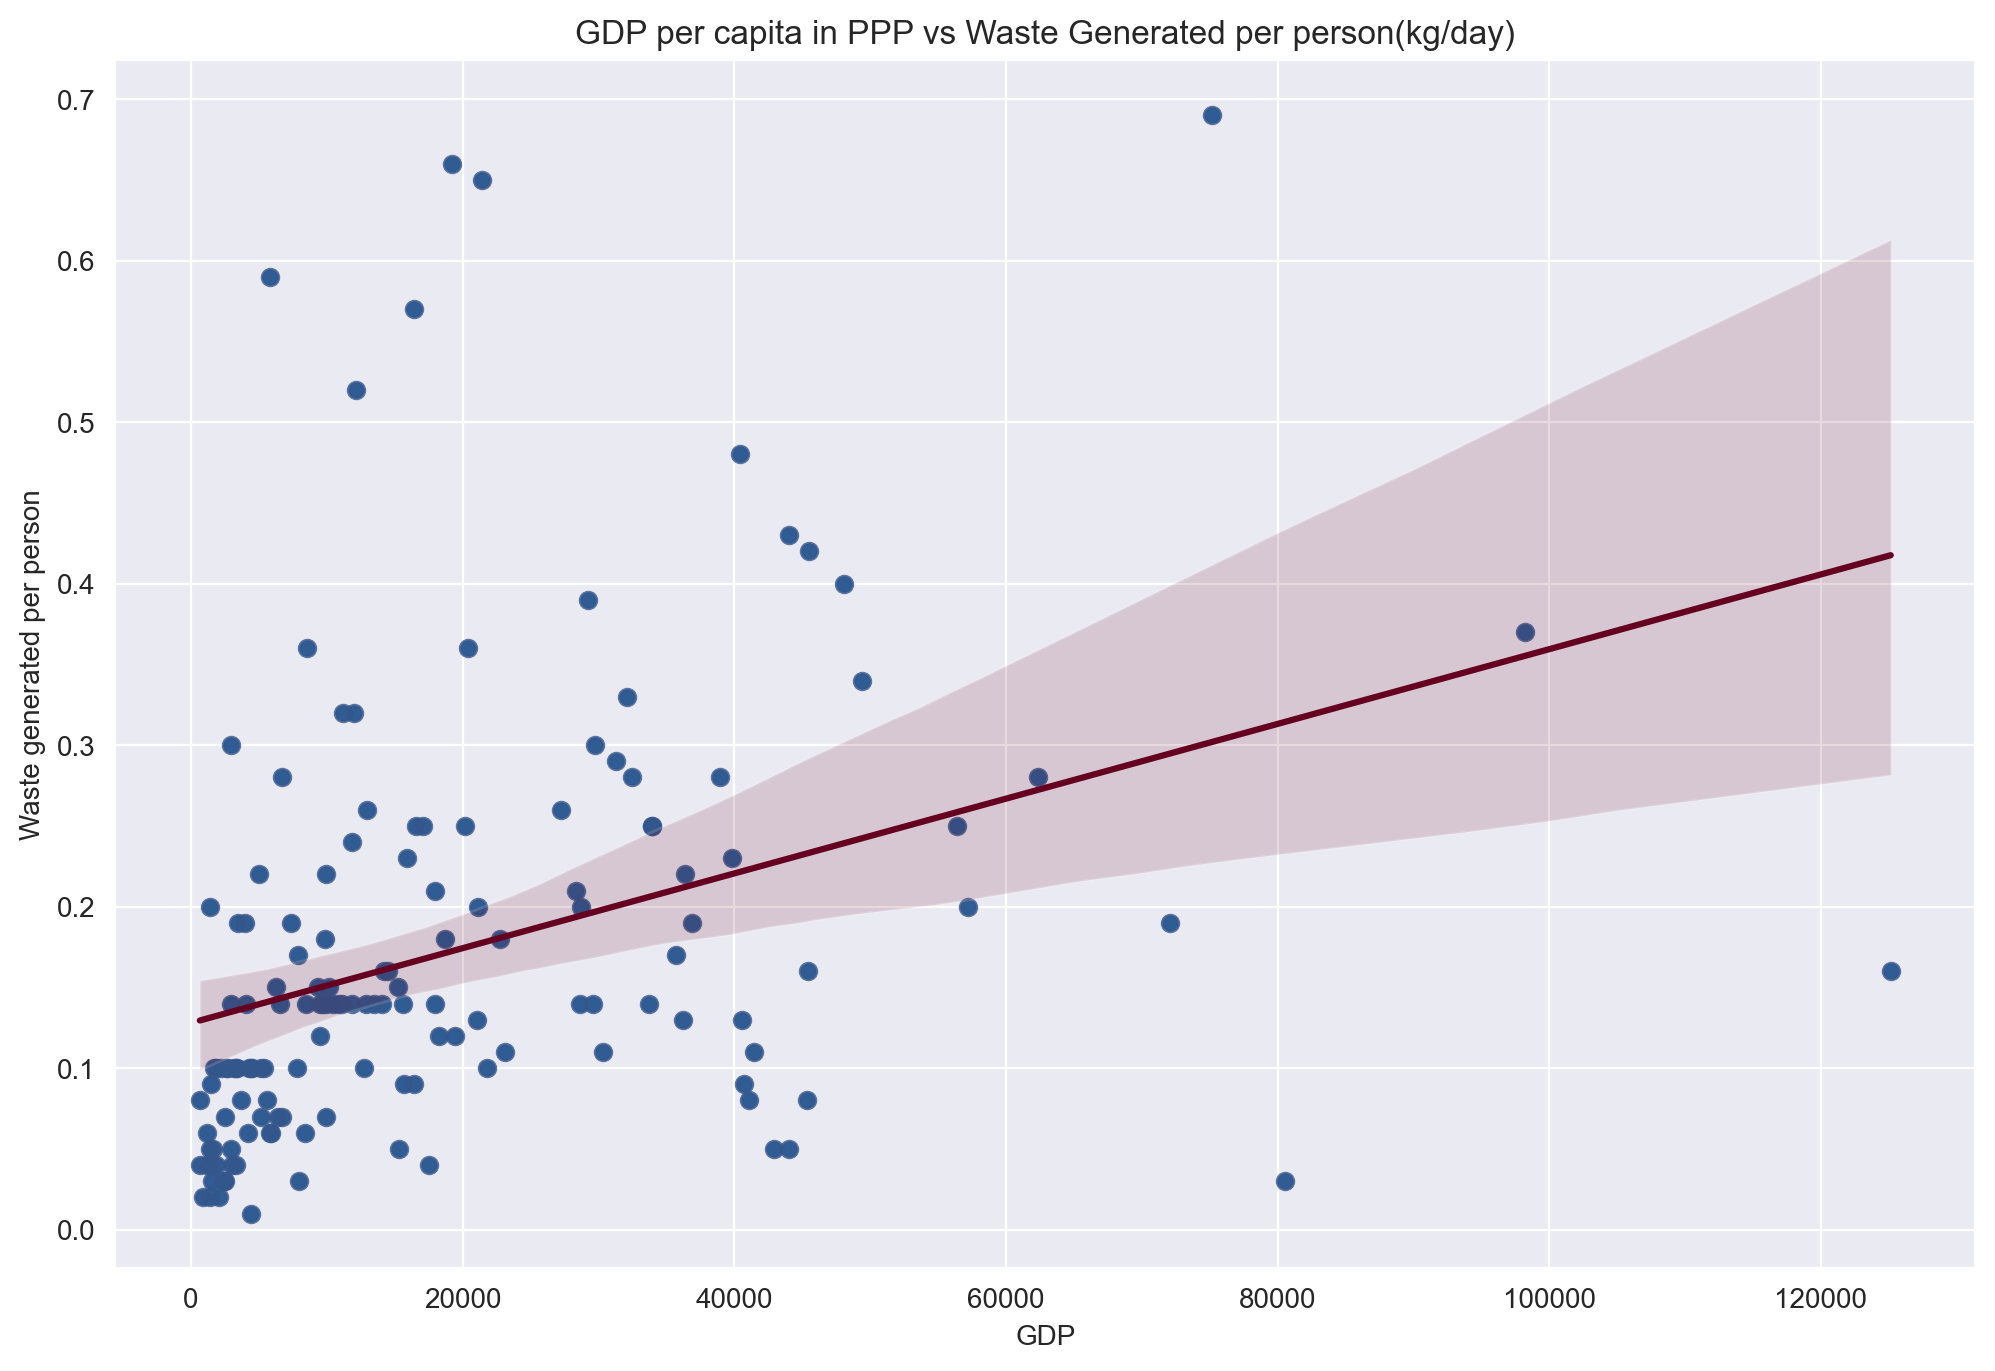

In [43]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(x='GDP per capita in PPP', y='Waste per person(kg/day)', data=df_plastic_waste)
sns.regplot(x='GDP per capita in PPP', y='Waste per person(kg/day)', data=df_plastic_waste,
           scatter_kws={'color': '#34568B'}, line_kws={'color': '#650021'})
plt.title('GDP per capita in PPP vs Waste Generated per person(kg/day)')
plt.xlabel('GDP')
plt.ylabel('Waste generated per person')

From the above graph we can infer that as the GDP increases in other words if a country is well developed then the waste generated also increases.
There is a slightly positive relationship between GDP and Waste generated per person as seen with the help of the `reg plot`.

## We now plot the GDP vs Waste Mismanaged per person as a `scatter plot` and find the relationship between them with the help of a `reg plot`

Text(0, 0.5, 'Mismanaged waste per person(kg/day)')

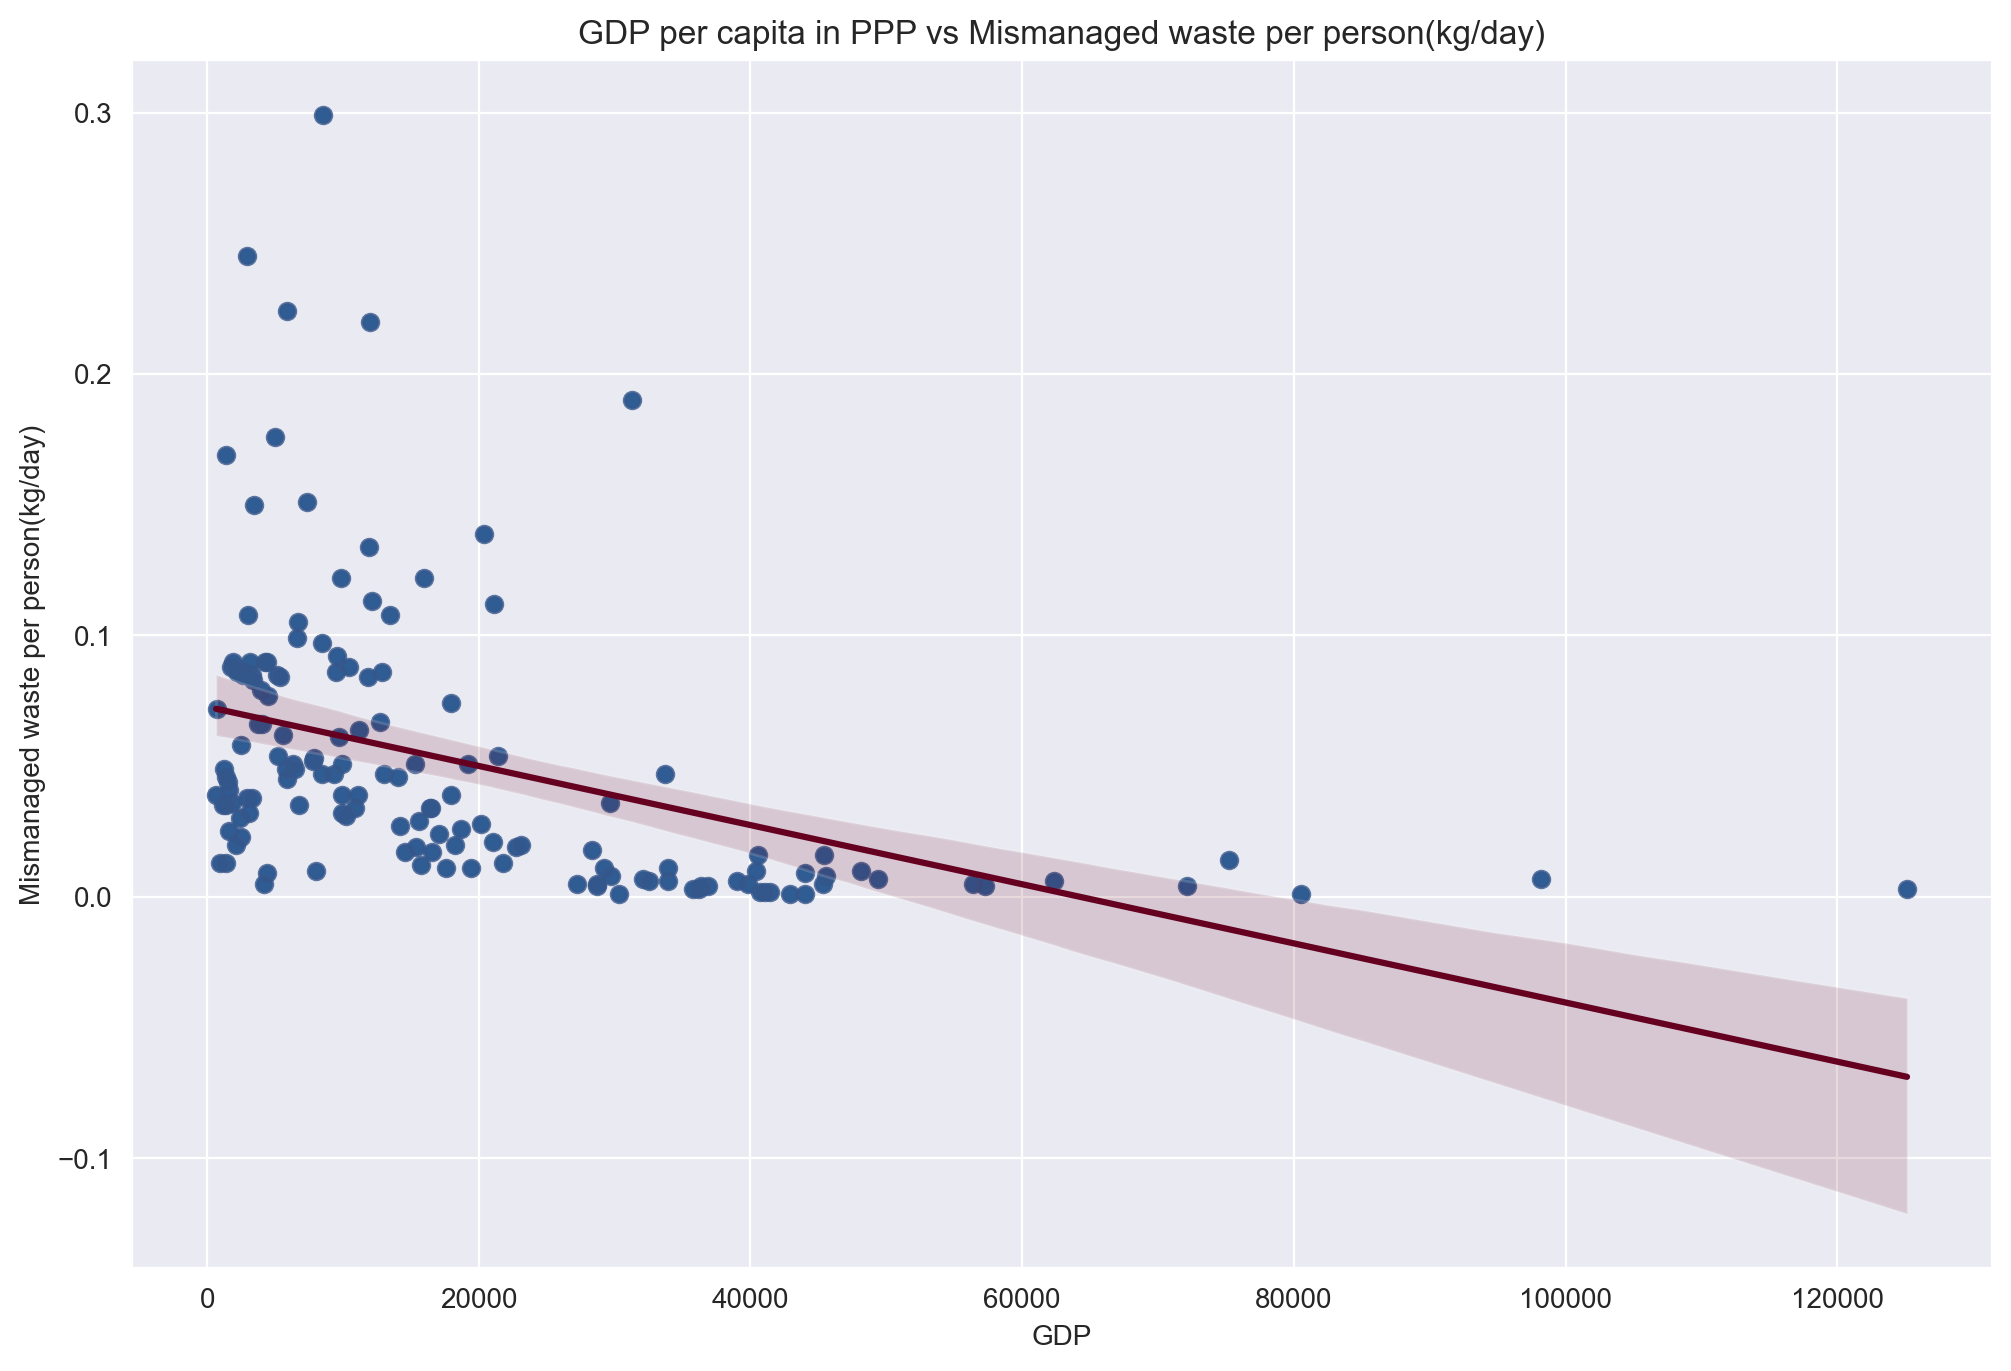

In [44]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(x='GDP per capita in PPP', y='Mismanaged waste per person(kg/day)', data=df_plastic_waste)
sns.regplot(x='GDP per capita in PPP', y='Mismanaged waste per person(kg/day)', data=df_plastic_waste,
           scatter_kws={'color': '#34568B'}, line_kws={'color': '#650021'})
plt.title('GDP per capita in PPP vs Mismanaged waste per person(kg/day)')
plt.xlabel('GDP')
plt.ylabel('Mismanaged waste per person(kg/day)')

From the above graph we can infer that as the GDP increases in other words if a country is well developed then the waste management becomes better.
There is a slightly negative relationship between GDP and Waste mismanaged per person as seen with the help of the `reg plot`.

## We now plot the average waste generated and the average waste mismanaged per day and per year continent-wise using a `bar plot`.

In [45]:
df_continent_wastes = df_plastic_waste.groupby('Continent').mean()

In [46]:
df_continent_wastes.index

Index(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'],
      dtype='object', name='Continent')

In [47]:
df_continent_wastes.head()

,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Mismanaged waste per person(kg/day),Total Waste(kgs/year),Total Mismanaged Waste(kgs/year)
Continent,,,,,,,
Africa,2010,0.095000,6586.769167,1.952440e+07,0.060025,6.632345e+08,4.819930e+08
Asia,2010,0.163514,28650.257353,1.099141e+08,0.053108,3.386741e+09,2.184711e+09
Europe,2010,0.197353,29650.809667,1.970959e+07,0.014618,1.432227e+09,9.791919e+07
North America,2010,0.250000,18133.365000,1.464649e+07,0.035081,1.312496e+09,8.177606e+07
Oceania,2010,0.178571,9233.159286,1.752619e+06,0.077857,8.971700e+07,1.805886e+07


Text(0.5, 1.0, 'Continent-wise waste generated per person(kg/day)')

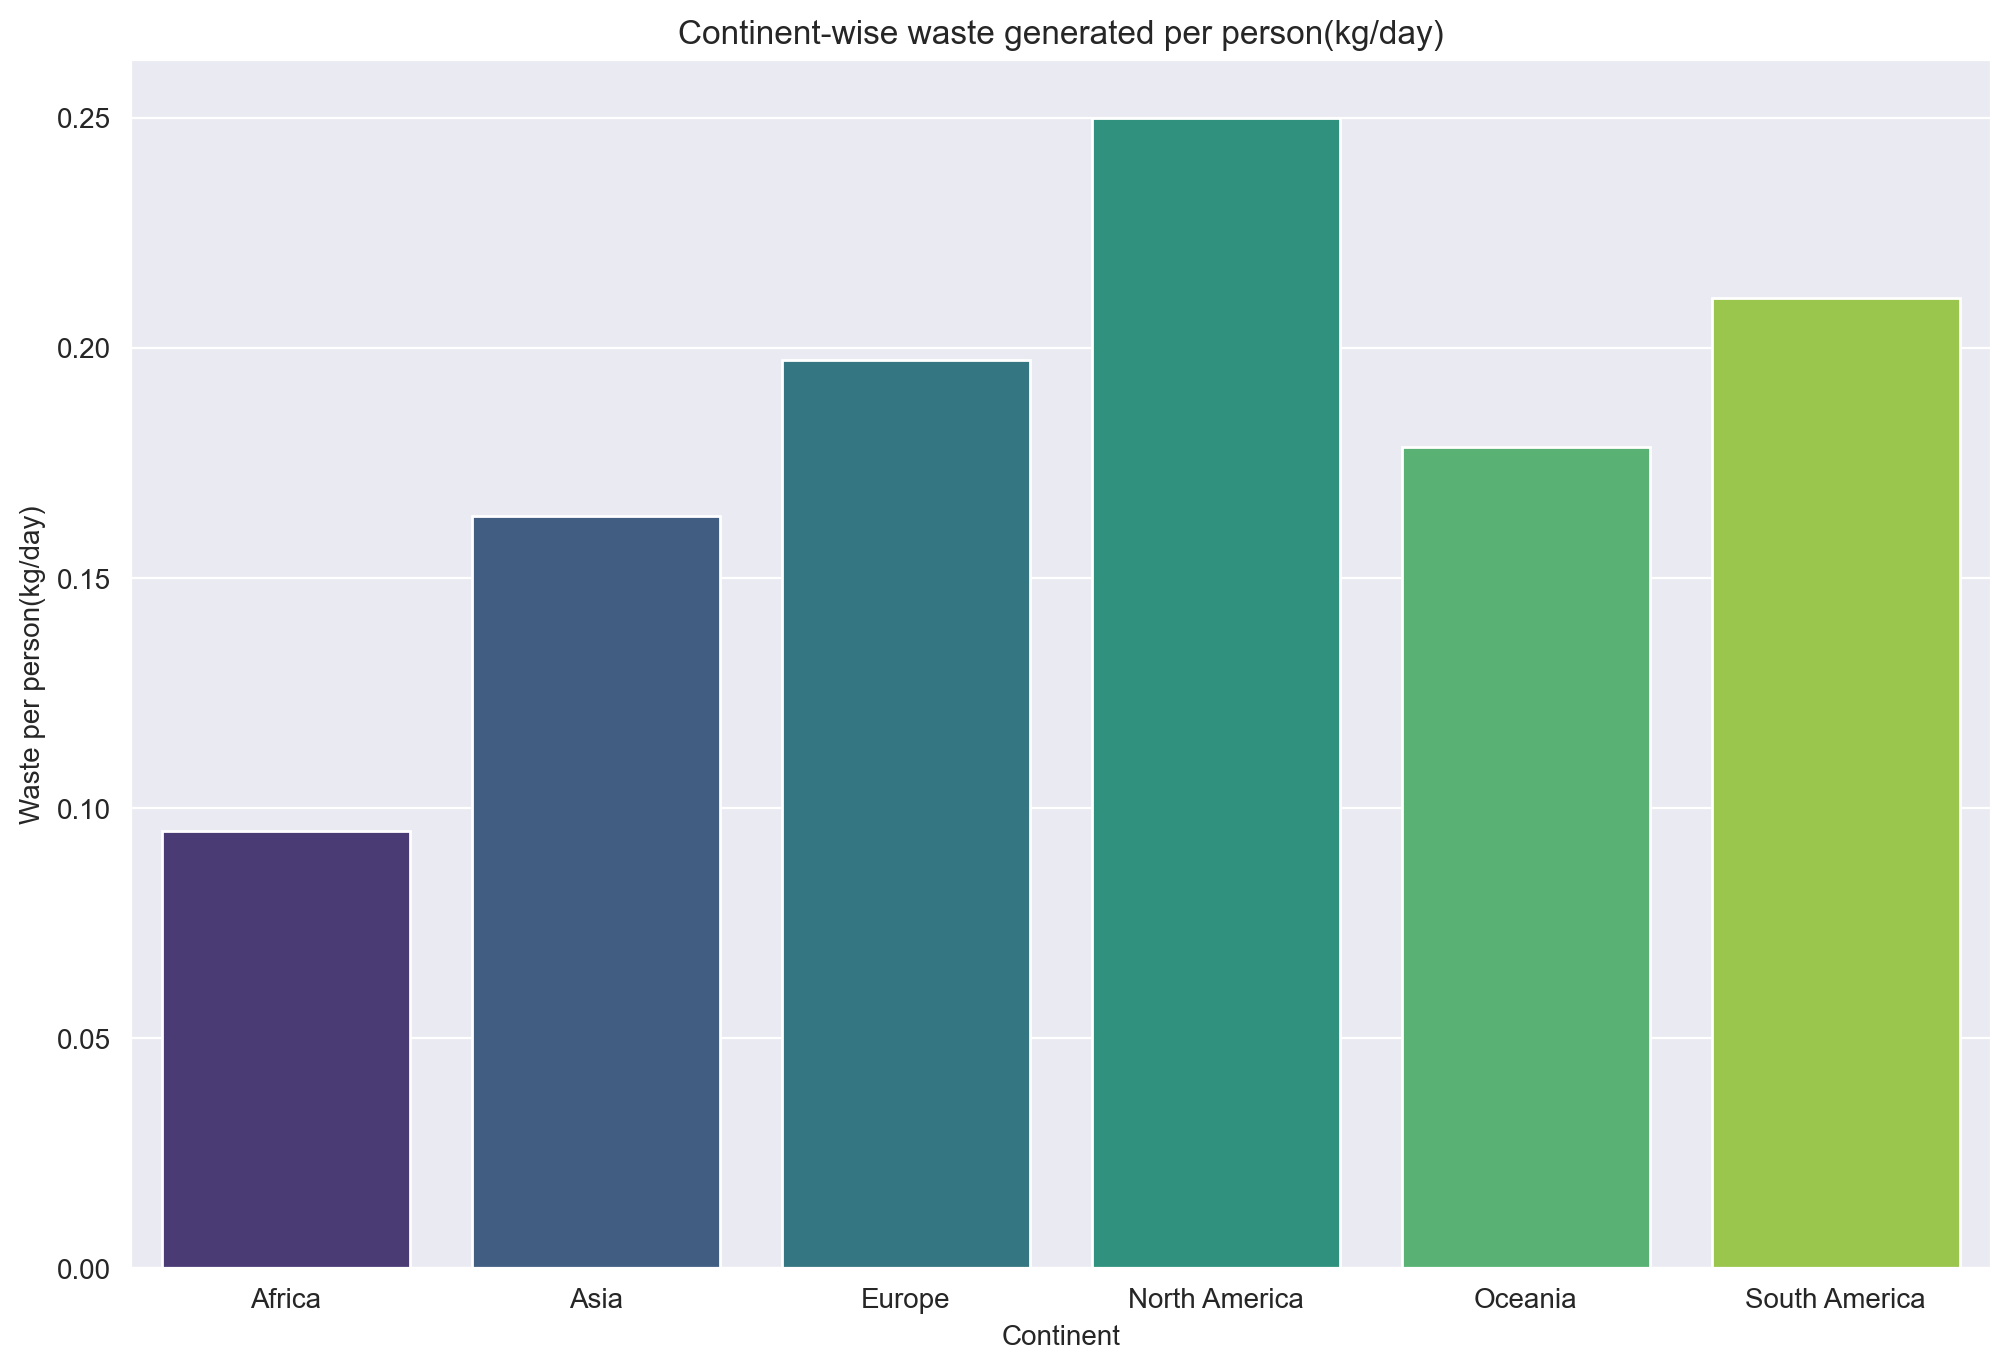

In [48]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(x=df_continent_wastes.index, y=df_continent_wastes['Waste per person(kg/day)'], palette='viridis')
plt.title("Continent-wise waste generated per person(kg/day)")

From the above plot we can see that North America generated most waste per person per day in 2010.

Text(0.5, 1.0, 'Continent-wise Mismanaged waste(kgs/day)')

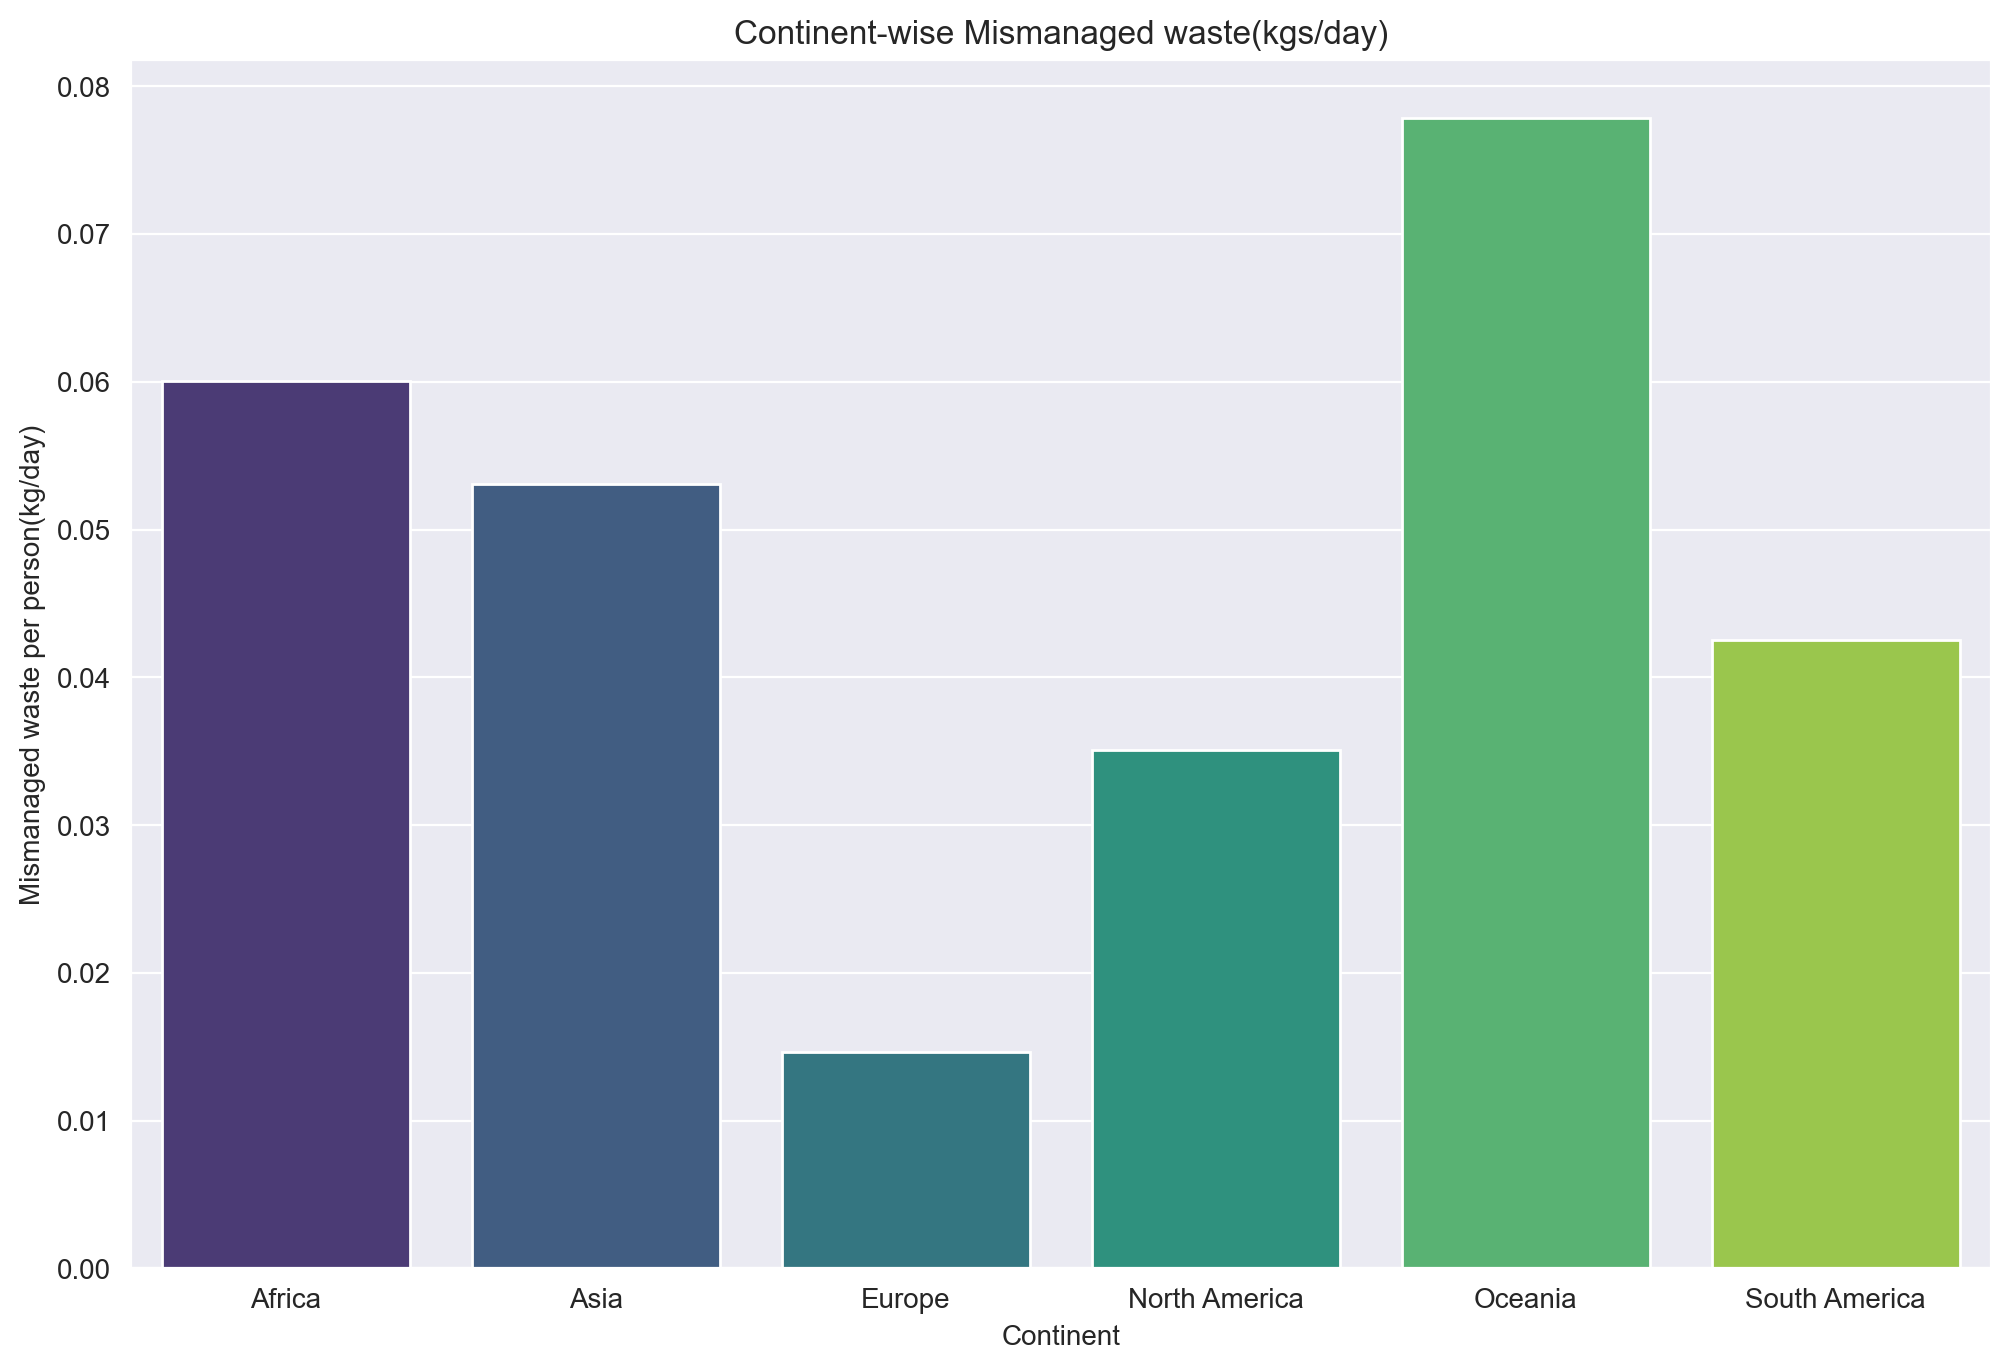

In [49]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(x=df_continent_wastes.index, y=df_continent_wastes['Mismanaged waste per person(kg/day)'], palette='viridis')
plt.title("Continent-wise Mismanaged waste(kgs/day)")

From the above plot we can see that most of the waste is mismanaged in Oceania per day per person in 2010 closely followed by Africa and Asia.

Text(0.5, 1.0, 'Continent-wise Total waste(kgs/year) generated')

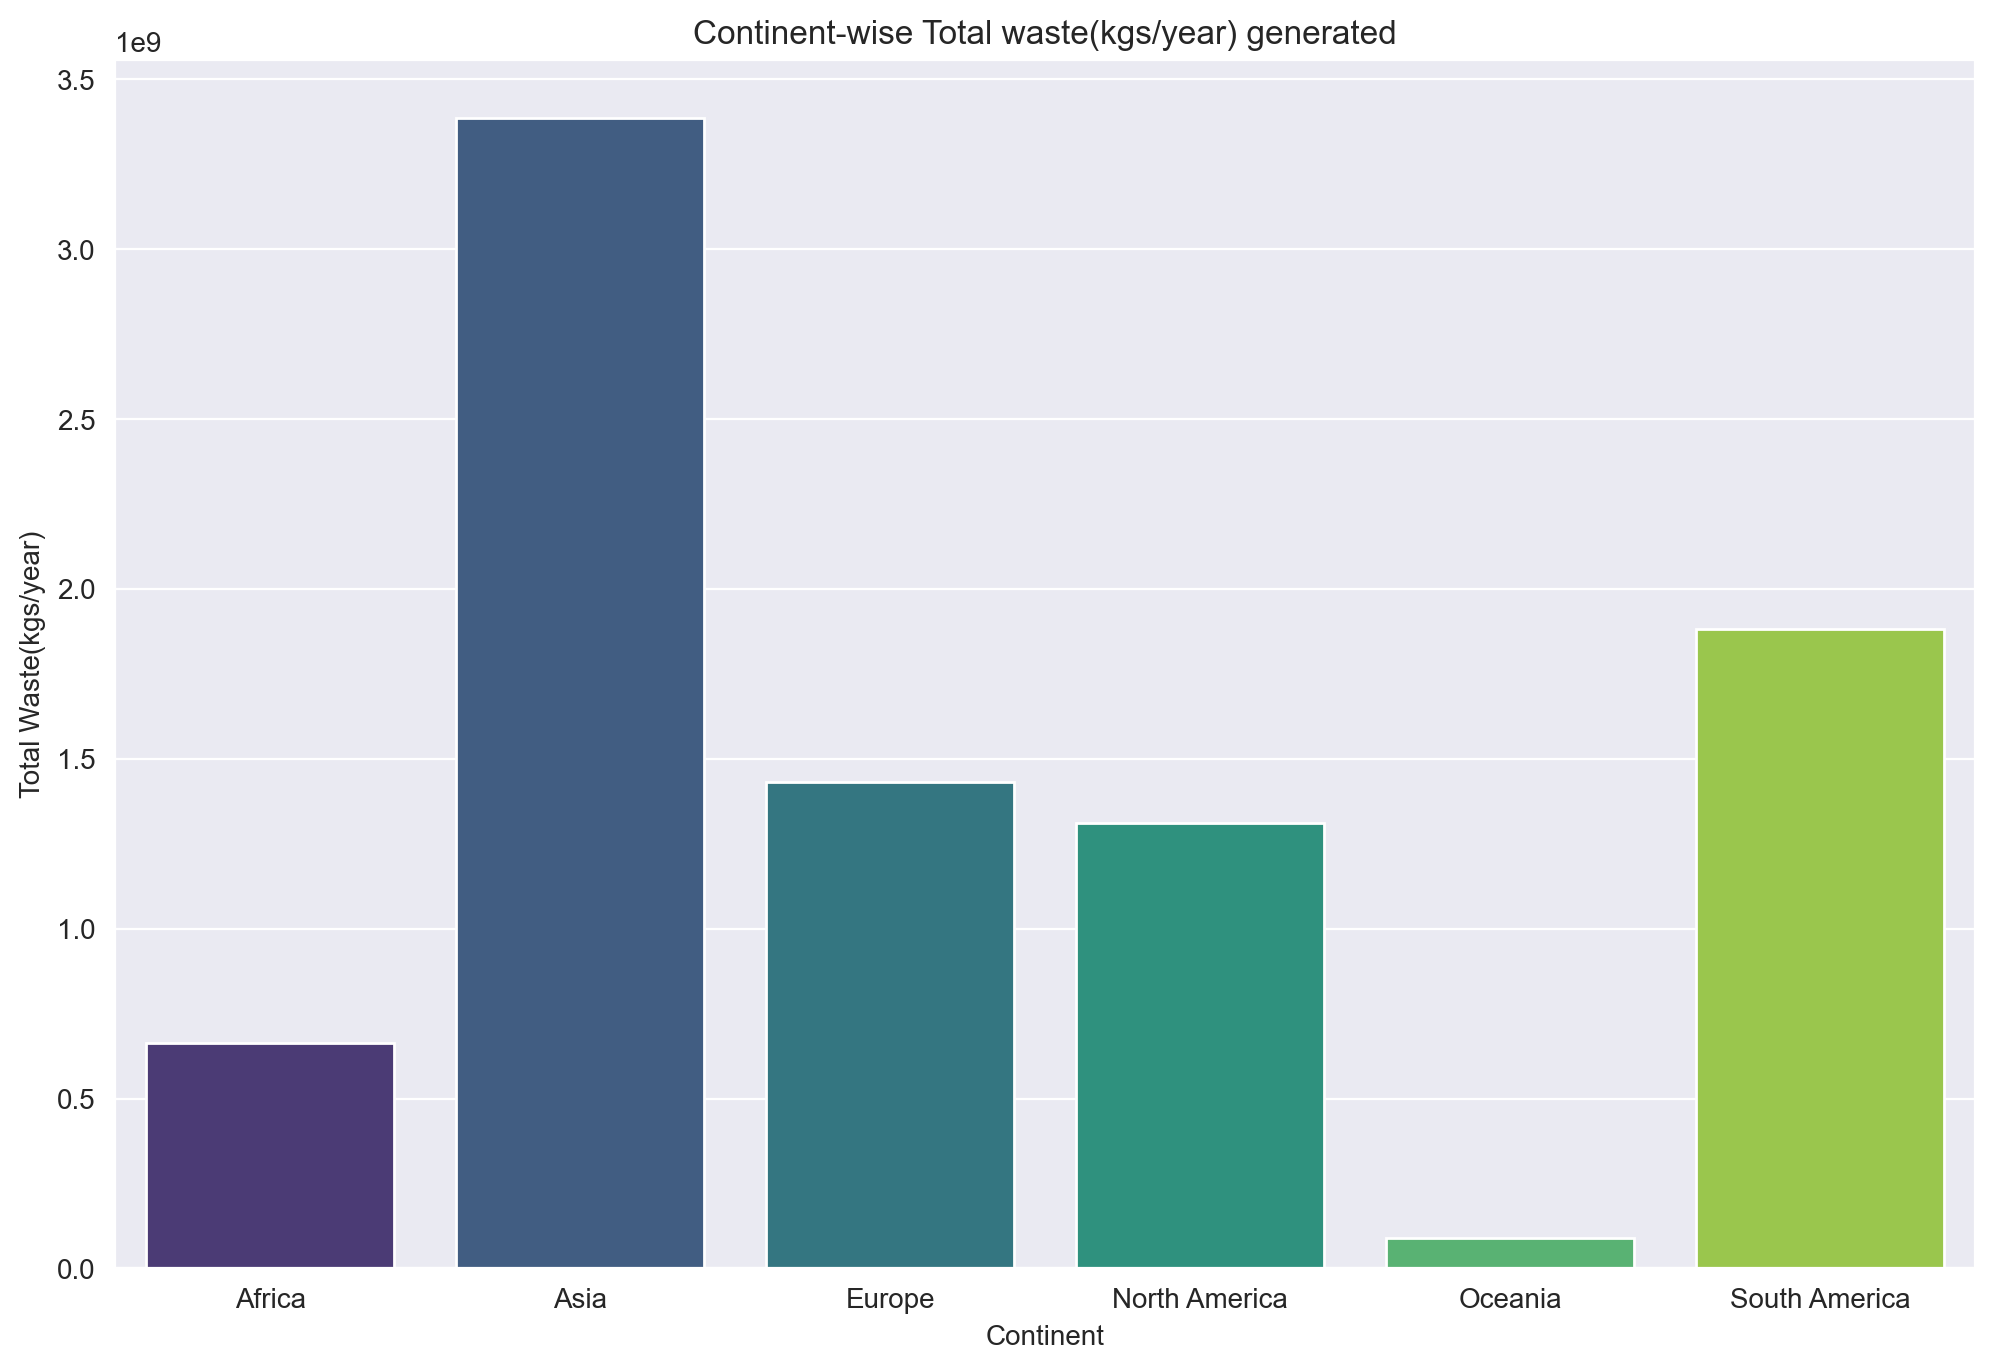

In [50]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(x=df_continent_wastes.index, y=df_continent_wastes['Total Waste(kgs/year)'], palette='viridis')
plt.title("Continent-wise Total waste(kgs/year) generated")

From the above plot we can see that even-though North America generated the most waste per day per person in 2010, the total waste generated(kgs/year) is highest in Asia in 2010.
This is because of the high population in Asia.

Text(0.5, 1.0, 'Continent-wise total waste(kgs/year) mismanaged')

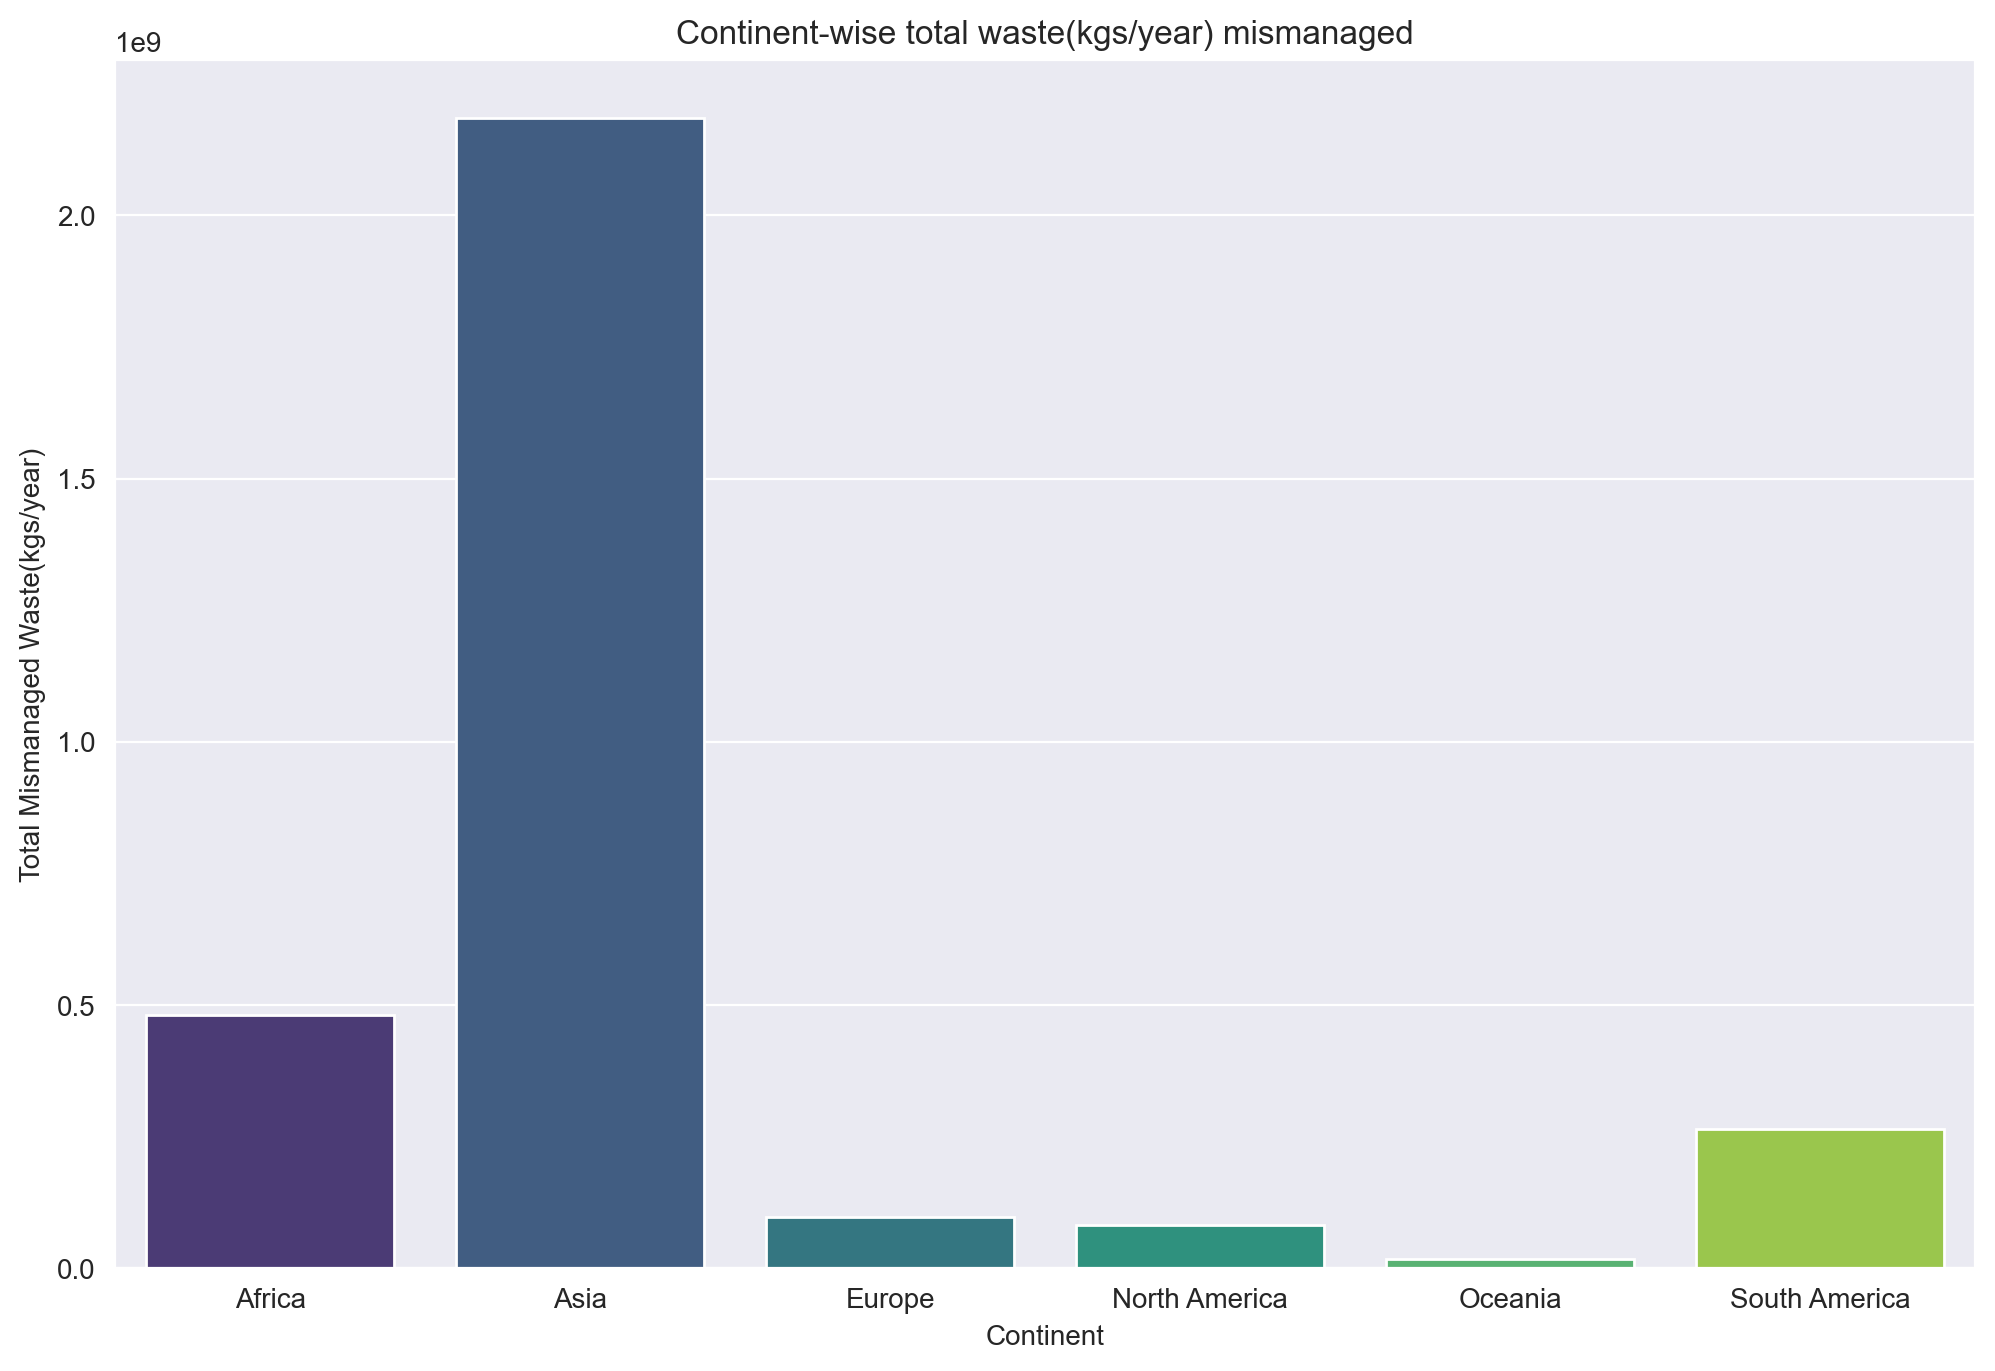

In [51]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(x=df_continent_wastes.index, y=df_continent_wastes['Total Mismanaged Waste(kgs/year)'], palette='viridis')
plt.title("Continent-wise total waste(kgs/year) mismanaged")

The waste mismanaged in 2010 in Asia is very high even though the waste mismanaged per day per person is high in Oceania in 2010.
This is also due to the high population in Asia.

## We now plot the average waste generated and the average waste mismanaged per day and per year for the top 10 countries using a `bar plot`.

In [52]:
df_country_wastes = df_plastic_waste.groupby('Entity').mean()


In [53]:
df_country_wastes = df_country_wastes.sort_values(by = 'Waste per person(kg/day)', ascending = False)

Text(0.5, 1.0, 'Top 10 countries that generate the most waste per person in a day')

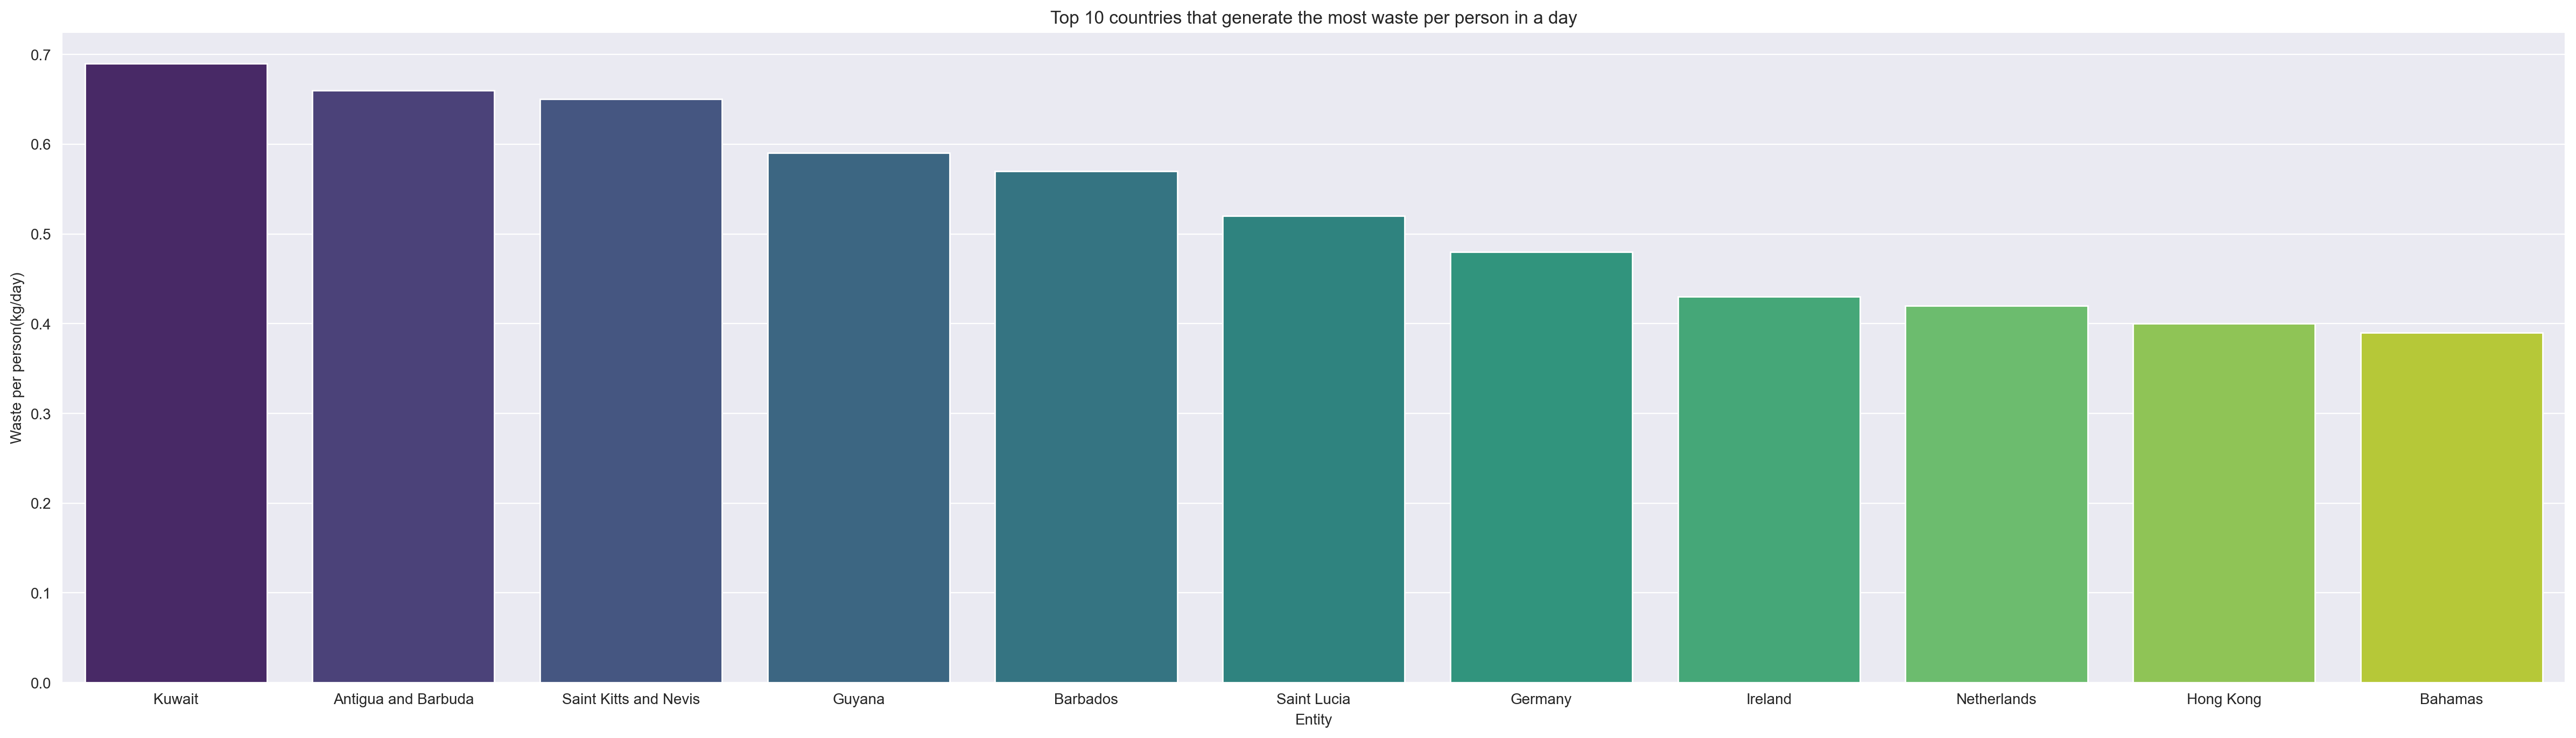

In [54]:
plt.figure(figsize=(30,8),dpi=200)
sns.barplot(x=df_country_wastes.index[:11], y=df_country_wastes['Waste per person(kg/day)'][:11], palette='viridis')
plt.title("Top 10 countries that generate the most waste per person in a day")

Kuwait produced the most waste per day per person in 2010.

In [55]:
df_country_wastes = df_country_wastes.sort_values(by = 'Mismanaged waste per person(kg/day)', ascending = False)

Text(0.5, 1.0, 'Top 10 countries where most waste is mismanaged in a day per person')

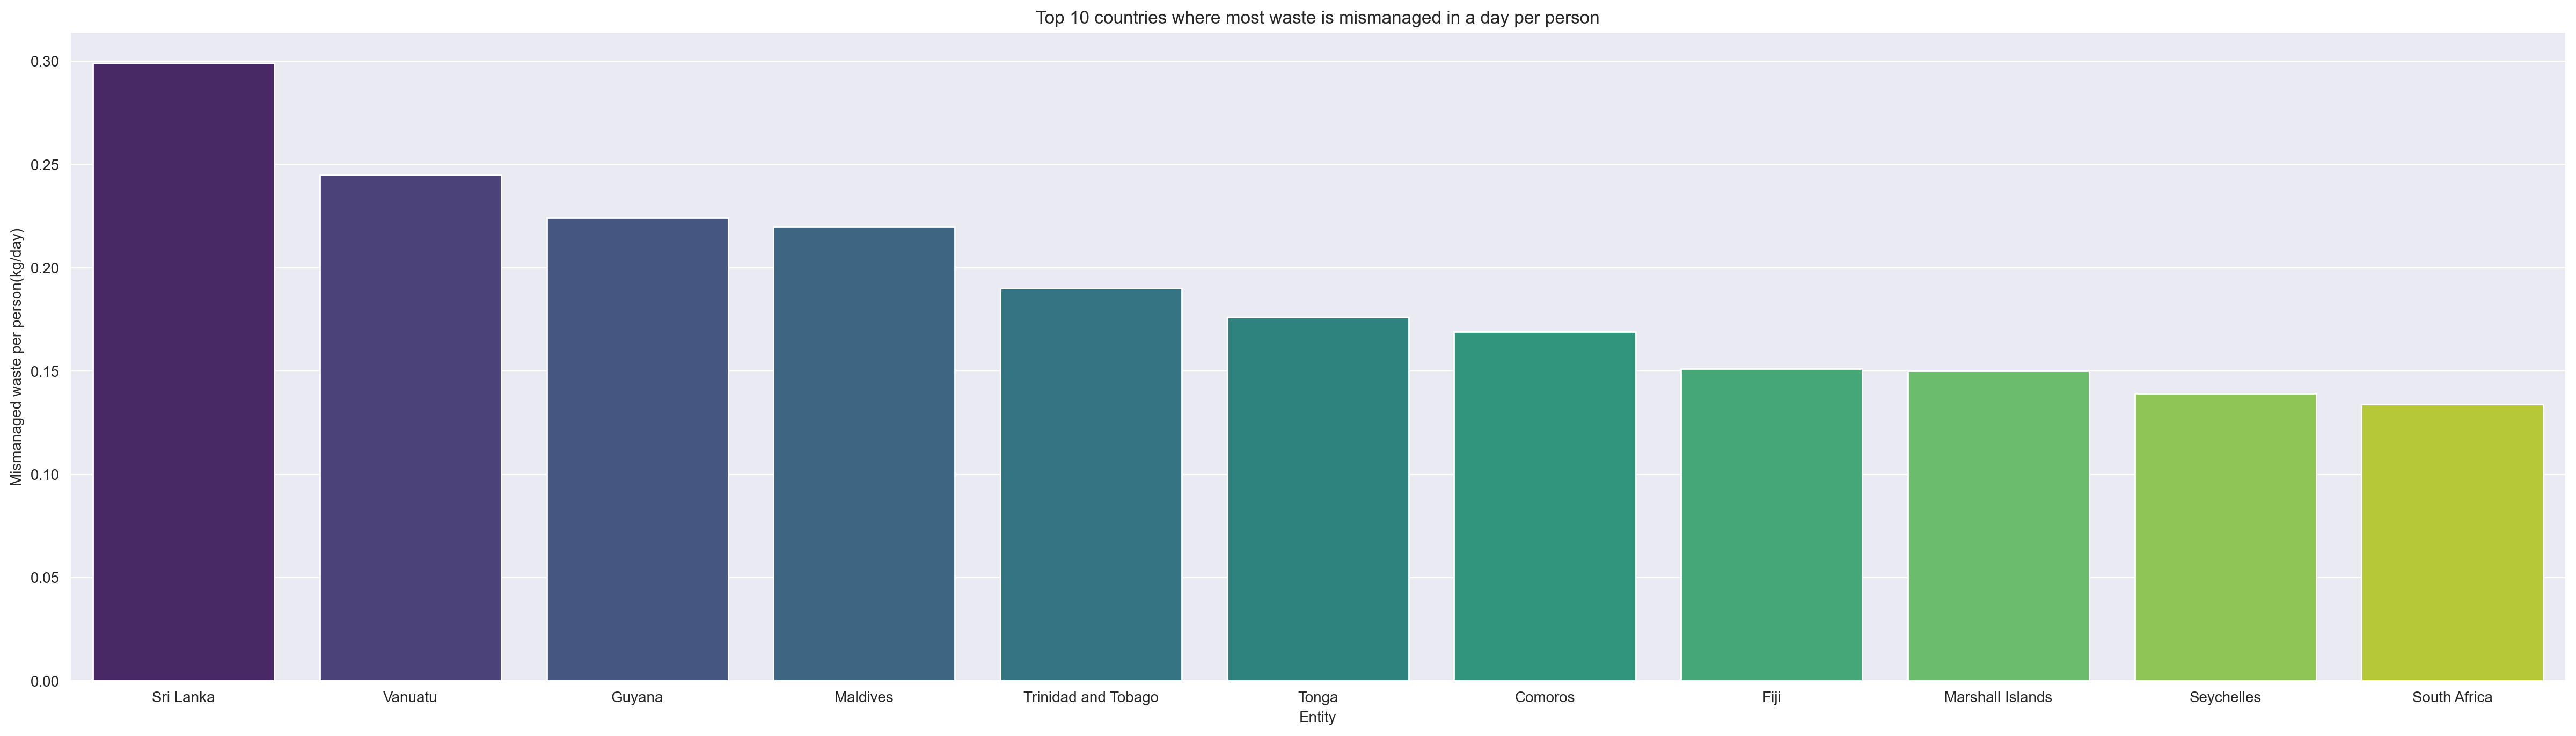

In [56]:
plt.figure(figsize=(30,8),dpi=200)
sns.barplot(x=df_country_wastes.index[:11], y=df_country_wastes['Mismanaged waste per person(kg/day)'][:11], palette='viridis')
plt.title("Top 10 countries where most waste is mismanaged in a day per person")

From the above plot we can see that Sri Lanka mismanaged most waste per person in a day in 2010.

In [57]:
df_country_wastes = df_country_wastes.sort_values(by = 'Total Waste(kgs/year)', ascending = False)

Text(0.5, 1.0, 'Top 10 countries that generate the most waste in a year')

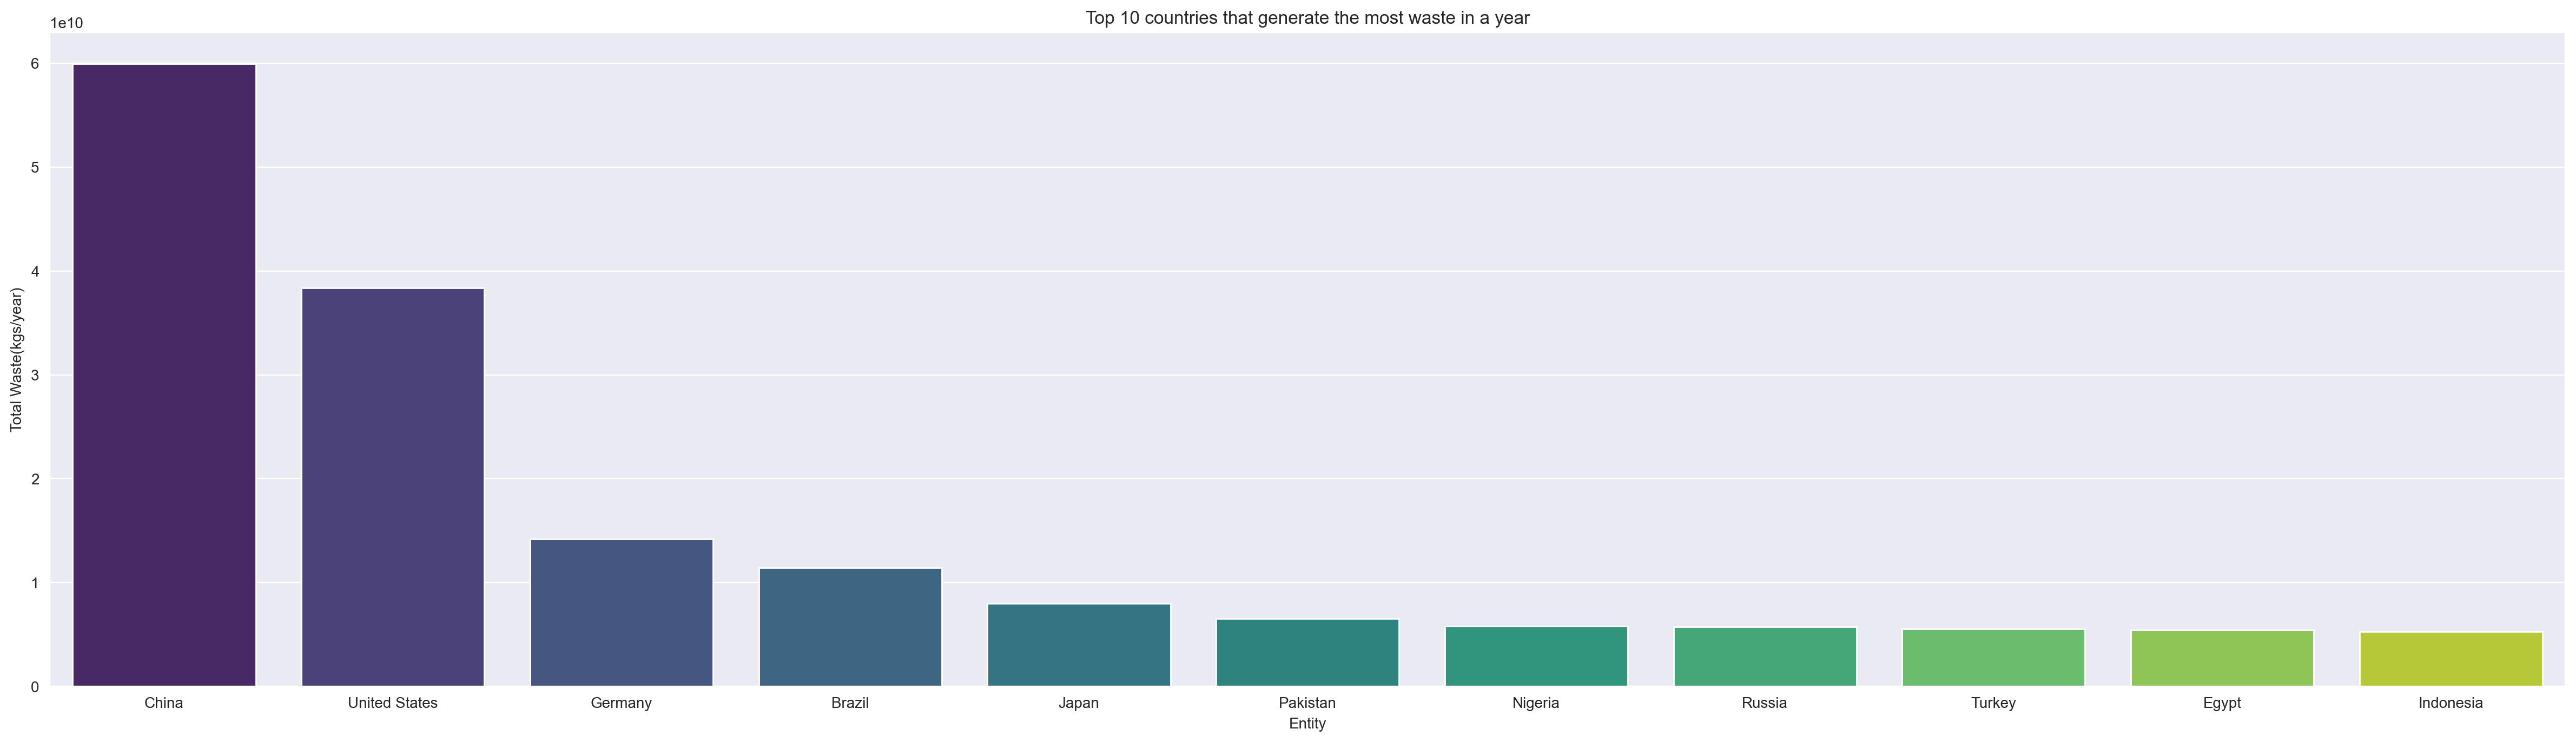

In [58]:
plt.figure(figsize=(30,8),dpi=200)
sns.barplot(x=df_country_wastes.index[:11], y=df_country_wastes['Total Waste(kgs/year)'][:11], palette='viridis')
plt.title("Top 10 countries that generate the most waste in a year")

We can see that China generated the most waste in a 2010.
This is due to the high population in China.

In [59]:
df_country_wastes = df_country_wastes.sort_values(by = 'Total Mismanaged Waste(kgs/year)', ascending = False)

Text(0.5, 1.0, 'Top 10 countries that mismanages the most waste in a year')

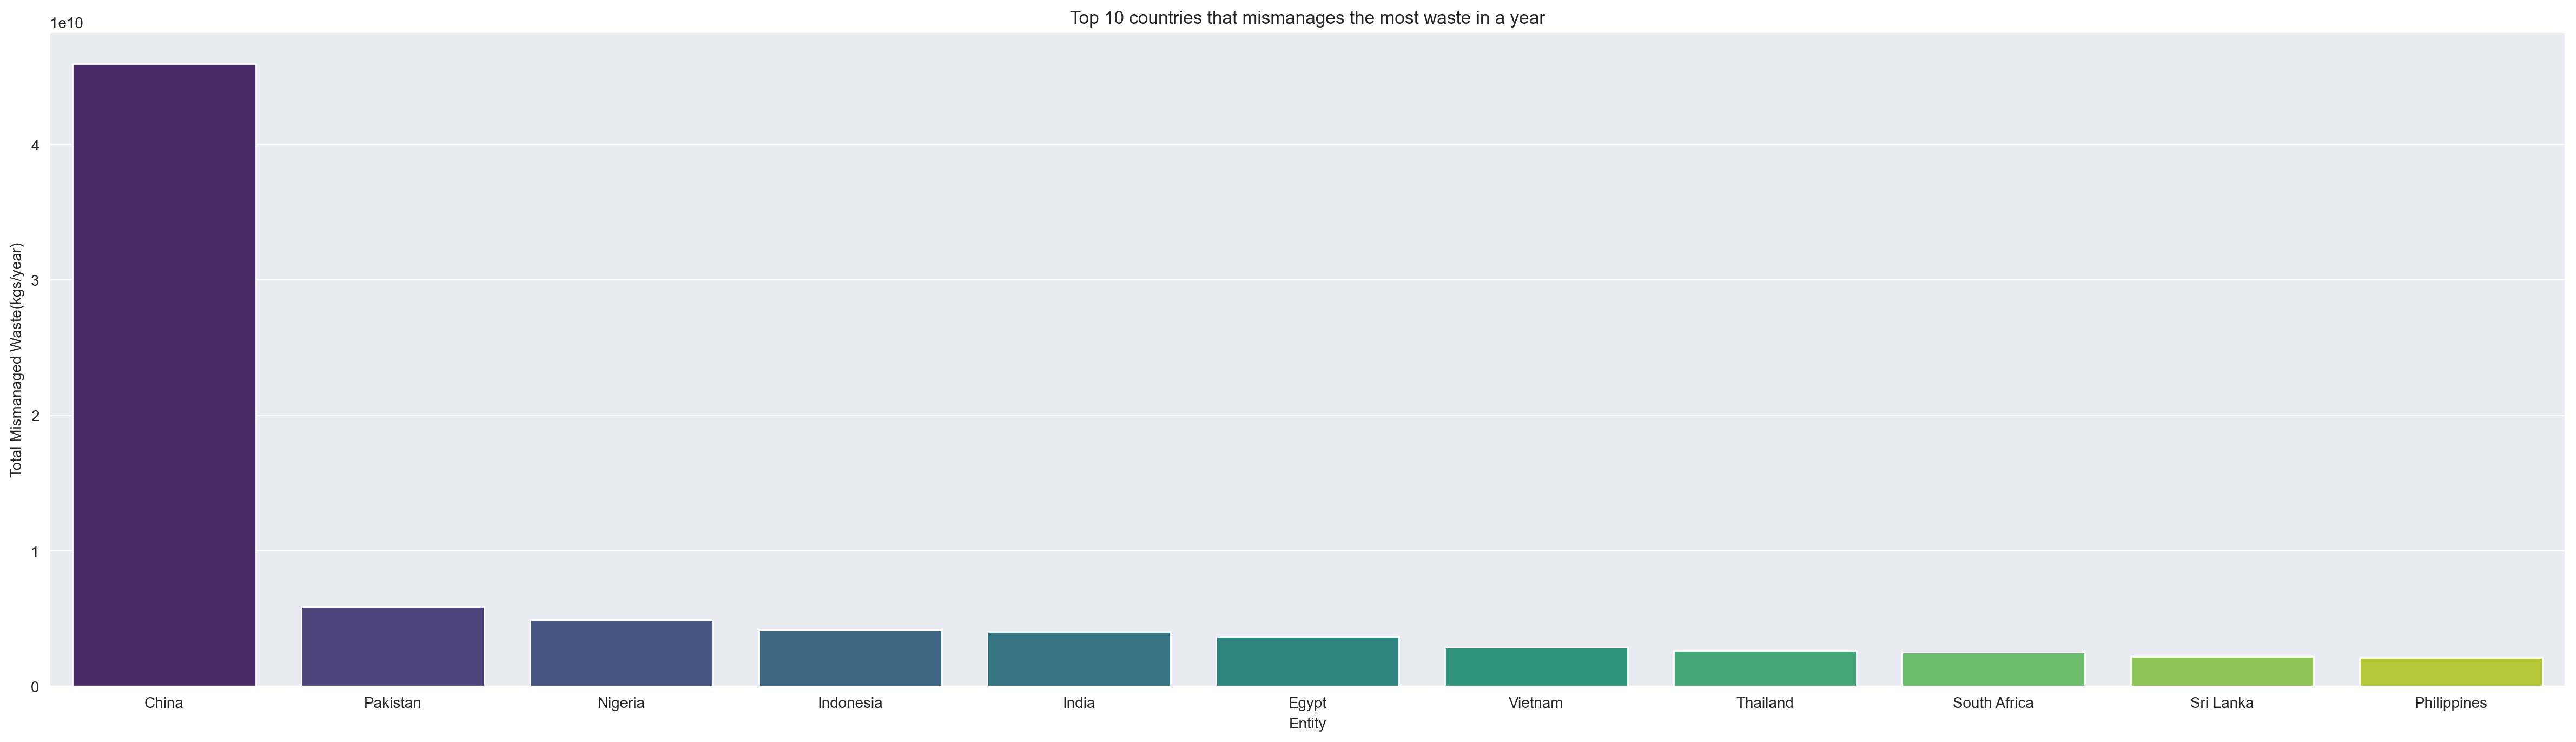

In [60]:
plt.figure(figsize=(30,8),dpi=200)
sns.barplot(x=df_country_wastes.index[:11], y=df_country_wastes['Total Mismanaged Waste(kgs/year)'][:11], palette='viridis')
plt.title("Top 10 countries that mismanages the most waste in a year")

From the above plot we can see that china has mismanaged most of the waste in 2010. This is due to the high population in china.